In [1]:
import matplotlib.pyplot as plt
import os
import csv
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn import datasets

Data_2015_path = "../Data/Happiness_2015.csv"
Data_2016_path = "../Data/Happiness_2016.csv"
Data_2017_path = "../Data/Happiness_2017.csv"
Data_2018_path = "../Data/Happiness_2018.csv"
Data_2019_path = "../Data/Happiness_2019.csv"
Urban_Total_path = "../Data/Urban_Data/API_SP.URB.TOTL_DS2_en_csv_v2_1565259.csv"
Urban_Indicator_path = "../Data/Urban_Data/Metadata_Country_API_SP.URB.TOTL_DS2_en_csv_v2_1565259.csv"

Data_2015 = pd.read_csv(Data_2015_path)

Data_2016 = pd.read_csv(Data_2016_path)
Data_2017 = pd.read_csv(Data_2017_path)
Data_2018 = pd.read_csv(Data_2018_path)
Data_2019 = pd.read_csv(Data_2019_path)
Urban_Total = pd.read_csv(Urban_Total_path,skiprows=3)
Urban_Indicator = pd.read_csv(Urban_Indicator_path)

#Urban_Total


In [2]:
combinedDF_2015_2016 = pd.merge(Data_2015,Data_2016, how="left",on="Country")
combinedDF_2015_2016

,Country,Happiness Rank_x,Happiness Score_x,Economy (GDP per Capita)_x,Family_x,Health (Life Expectancy)_x,Freedom_x,Trust (Government Corruption)_x,Generosity_x,Happiness Rank_y,Happiness Score_y,Economy (GDP per Capita)_y,Family_y,Health (Life Expectancy)_y,Freedom_y,Trust (Government Corruption)_y,Generosity_y
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.0,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,3.0,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,1.0,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,4.0,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,6.0,7.404,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,154,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,152.0,3.515,0.32846,0.61586,0.31865,0.54320,0.50521,0.23552
154,Benin,155,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,153.0,3.484,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180
155,Syria,156,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,156.0,3.069,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397
156,Burundi,157,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,157.0,2.905,0.06831,0.23442,0.15747,0.04320,0.09419,0.20290


In [3]:
combinedDF_rename_2015_2016 = combinedDF_2015_2016.rename(columns={"Happiness Rank_x":"2015 Happiness Rank",
                                                         "Happiness Score_x":"2015 Happiness Score","Economy (GDP per Capita)_x":"2015 Economy (GDP per Capita)",
                                                         "Family_x":"2015 Family","Health (Life Expectancy)_x":"2015 Health (Life Expectancy)","Freedom_x":"2015 Freedom",
                                                         "Trust (Government Corruption)_x":"2015 Trust (Government Corruption)","Generosity_x":"2015 Generosity","Happiness Rank_y":"2016 Happiness Rank",
                                                         "Happiness Score_y":"2016 Happiness Score","Economy (GDP per Capita)_y":"2016 Economy (GDP per Capita)",
                                                         "Family_y":"2016 Family","Health (Life Expectancy)_y":"2016 Health (Life Expectancy)","Freedom_y":"2016 Freedom",
                                                         "Trust (Government Corruption)_y":"2016 Trust (Government Corruption)","Generosity_y":"2016 Generosity"})
combinedDF_rename_2015_2016


,Country,2015 Happiness Rank,2015 Happiness Score,2015 Economy (GDP per Capita),2015 Family,2015 Health (Life Expectancy),2015 Freedom,2015 Trust (Government Corruption),2015 Generosity,2016 Happiness Rank,2016 Happiness Score,2016 Economy (GDP per Capita),2016 Family,2016 Health (Life Expectancy),2016 Freedom,2016 Trust (Government Corruption),2016 Generosity
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.0,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,3.0,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,1.0,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,4.0,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,6.0,7.404,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,154,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,152.0,3.515,0.32846,0.61586,0.31865,0.54320,0.50521,0.23552
154,Benin,155,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,153.0,3.484,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180
155,Syria,156,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,156.0,3.069,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397
156,Burundi,157,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,157.0,2.905,0.06831,0.23442,0.15747,0.04320,0.09419,0.20290


In [4]:
Data_2018

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
...,...,...,...,...,...,...,...,...,...
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038


In [5]:
Data_20181=Data_2018[["Country or region","Overall rank","Score","GDP per capita","Social support",
                      "Healthy life expectancy","Freedom to make life choices","Perceptions of corruption",
                      "Generosity"]]
Data_2018_rename=Data_20181.rename(columns={"Country or region":"Country","Overall rank":"2018 Happiness Rank","Score":"2018 Happiness Score",
                                            "GDP per capita":"2018 Economy (GDP per Capita)","Social support":"2018 Family",
                                            "Healthy life expectancy":"2018 Health (Life Expectancy)","Freedom to make life choices":"2018 Freedom",
                                            "Perceptions of corruption":"2018 Trust (Government Corruption)","Generosity":"2018 Generosity"})
Data_2018_rename

,Country,2018 Happiness Rank,2018 Happiness Score,2018 Economy (GDP per Capita),2018 Family,2018 Health (Life Expectancy),2018 Freedom,2018 Trust (Government Corruption),2018 Generosity
0,Finland,1,7.632,1.305,1.592,0.874,0.681,0.393,0.202
1,Norway,2,7.594,1.456,1.582,0.861,0.686,0.340,0.286
2,Denmark,3,7.555,1.351,1.590,0.868,0.683,0.408,0.284
3,Iceland,4,7.495,1.343,1.644,0.914,0.677,0.138,0.353
4,Switzerland,5,7.487,1.420,1.549,0.927,0.660,0.357,0.256
...,...,...,...,...,...,...,...,...,...
151,Yemen,152,3.355,0.442,1.073,0.343,0.244,0.064,0.083
152,Tanzania,153,3.303,0.455,0.991,0.381,0.481,0.097,0.270
153,South Sudan,154,3.254,0.337,0.608,0.177,0.112,0.106,0.224
154,Central African Republic,155,3.083,0.024,0.000,0.010,0.305,0.038,0.218


In [6]:
Data_20171=Data_2017[["Country","Happiness.Rank","Happiness.Score","Economy..GDP.per.Capita.","Family","Health..Life.Expectancy.",
                     "Freedom","Trust..Government.Corruption.","Generosity"]]
Data_2017_rename = Data_20171.rename(columns={"Happiness.Rank":"2017 Happiness Rank","Happiness.Score":"2017 Happiness Score",
                                             "Economy..GDP.per.Capita.":"2017 Economy (GDP per Capita)","Family":"2017 Family",
                                             "Health..Life.Expectancy.":"2017 Health Life Expectancy","Freedom":"2017 Freedom",
                                            "Trust..Government.Corruption.":"2017 Trust (Government Corruption)","Generosity":"2017 Generosity"})
Data_2017_rename

,Country,2017 Happiness Rank,2017 Happiness Score,2017 Economy (GDP per Capita),2017 Family,2017 Health Life Expectancy,2017 Freedom,2017 Trust (Government Corruption),2017 Generosity
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.400770,0.355280
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.153527,0.475540
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.367007,0.290549
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.382612,0.245483
...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,0.368746,0.945707,0.326425,0.581844,0.455220,0.252756
151,Syria,152,3.462,0.777153,0.396103,0.500533,0.081539,0.151347,0.493664
152,Tanzania,153,3.349,0.511136,1.041990,0.364509,0.390018,0.066035,0.354256
153,Burundi,154,2.905,0.091623,0.629794,0.151611,0.059901,0.084148,0.204435


In [7]:
combinedDF_rename_2017_2018 = pd.merge(Data_2017_rename,Data_2018_rename, how="left",on="Country")
combinedDF_rename_2017_2018

,Country,2017 Happiness Rank,2017 Happiness Score,2017 Economy (GDP per Capita),2017 Family,2017 Health Life Expectancy,2017 Freedom,2017 Trust (Government Corruption),2017 Generosity,2018 Happiness Rank,2018 Happiness Score,2018 Economy (GDP per Capita),2018 Family,2018 Health (Life Expectancy),2018 Freedom,2018 Trust (Government Corruption),2018 Generosity
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012,2.0,7.594,1.456,1.582,0.861,0.686,0.340,0.286
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.400770,0.355280,3.0,7.555,1.351,1.590,0.868,0.683,0.408,0.284
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.153527,0.475540,4.0,7.495,1.343,1.644,0.914,0.677,0.138,0.353
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.367007,0.290549,5.0,7.487,1.420,1.549,0.927,0.660,0.357,0.256
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.382612,0.245483,1.0,7.632,1.305,1.592,0.874,0.681,0.393,0.202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,0.368746,0.945707,0.326425,0.581844,0.455220,0.252756,151.0,3.408,0.332,0.896,0.400,0.636,0.444,0.200
151,Syria,152,3.462,0.777153,0.396103,0.500533,0.081539,0.151347,0.493664,150.0,3.462,0.689,0.382,0.539,0.088,0.144,0.376
152,Tanzania,153,3.349,0.511136,1.041990,0.364509,0.390018,0.066035,0.354256,153.0,3.303,0.455,0.991,0.381,0.481,0.097,0.270
153,Burundi,154,2.905,0.091623,0.629794,0.151611,0.059901,0.084148,0.204435,156.0,2.905,0.091,0.627,0.145,0.065,0.076,0.149


In [8]:
Data_20191=Data_2019[["Country or region","Overall rank","Score","GDP per capita","Social support",
                      "Healthy life expectancy","Freedom to make life choices","Perceptions of corruption",
                      "Generosity"]]
Data_2019_rename=Data_20191.rename(columns={"Country or region":"Country","Overall rank":"2019 Happiness Rank","Score":"2019 Happiness Score",
                                            "GDP per capita":"2019 Economy (GDP per Capita)","Social support":"2019 Family",
                                            "Healthy life expectancy":"2019 Health (Life Expectancy)","Freedom to make life choices":"2019 Freedom",
                                            "Perceptions of corruption":"2019 Trust (Government Corruption)","Generosity":"2019 Generosity"})
Data_2019_rename

,Country,2019 Happiness Rank,2019 Happiness Score,2019 Economy (GDP per Capita),2019 Family,2019 Health (Life Expectancy),2019 Freedom,2019 Trust (Government Corruption),2019 Generosity
0,Finland,1,7.769,1.340,1.587,0.986,0.596,0.393,0.153
1,Denmark,2,7.600,1.383,1.573,0.996,0.592,0.410,0.252
2,Norway,3,7.554,1.488,1.582,1.028,0.603,0.341,0.271
3,Iceland,4,7.494,1.380,1.624,1.026,0.591,0.118,0.354
4,Netherlands,5,7.488,1.396,1.522,0.999,0.557,0.298,0.322
...,...,...,...,...,...,...,...,...,...
151,Rwanda,152,3.334,0.359,0.711,0.614,0.555,0.411,0.217
152,Tanzania,153,3.231,0.476,0.885,0.499,0.417,0.147,0.276
153,Afghanistan,154,3.203,0.350,0.517,0.361,0.000,0.025,0.158
154,Central African Republic,155,3.083,0.026,0.000,0.105,0.225,0.035,0.235


In [9]:
combined_15_16_17_18 = pd.merge(combinedDF_rename_2015_2016,combinedDF_rename_2017_2018, how="left",on="Country")
combined_15_16_17_18

,Country,2015 Happiness Rank,2015 Happiness Score,2015 Economy (GDP per Capita),2015 Family,2015 Health (Life Expectancy),2015 Freedom,2015 Trust (Government Corruption),2015 Generosity,2016 Happiness Rank,...,2017 Trust (Government Corruption),2017 Generosity,2018 Happiness Rank,2018 Happiness Score,2018 Economy (GDP per Capita),2018 Family,2018 Health (Life Expectancy),2018 Freedom,2018 Trust (Government Corruption),2018 Generosity
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.0,...,0.367007,0.290549,5.0,7.487,1.420,1.549,0.927,0.660,0.357,0.256
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,3.0,...,0.153527,0.475540,4.0,7.495,1.343,1.644,0.914,0.677,0.138,0.353
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,1.0,...,0.400770,0.355280,3.0,7.555,1.351,1.590,0.868,0.683,0.408,0.284
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,4.0,...,0.315964,0.362012,2.0,7.594,1.456,1.582,0.861,0.686,0.340,0.286
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,6.0,...,0.287372,0.435540,7.0,7.328,1.330,1.532,0.896,0.653,0.291,0.321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,154,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,152.0,...,0.455220,0.252756,151.0,3.408,0.332,0.896,0.400,0.636,0.444,0.200
154,Benin,155,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,153.0,...,0.060929,0.207948,136.0,4.141,0.378,0.372,0.240,0.440,0.067,0.163
155,Syria,156,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,156.0,...,0.151347,0.493664,150.0,3.462,0.689,0.382,0.539,0.088,0.144,0.376
156,Burundi,157,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,157.0,...,0.084148,0.204435,156.0,2.905,0.091,0.627,0.145,0.065,0.076,0.149


In [10]:
final_combined = pd.merge(combined_15_16_17_18,Data_2019_rename, how="left",on="Country")
final_combined


,Country,2015 Happiness Rank,2015 Happiness Score,2015 Economy (GDP per Capita),2015 Family,2015 Health (Life Expectancy),2015 Freedom,2015 Trust (Government Corruption),2015 Generosity,2016 Happiness Rank,...,2018 Trust (Government Corruption),2018 Generosity,2019 Happiness Rank,2019 Happiness Score,2019 Economy (GDP per Capita),2019 Family,2019 Health (Life Expectancy),2019 Freedom,2019 Trust (Government Corruption),2019 Generosity
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.0,...,0.357,0.256,6.0,7.480,1.452,1.526,1.052,0.572,0.343,0.263
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,3.0,...,0.138,0.353,4.0,7.494,1.380,1.624,1.026,0.591,0.118,0.354
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,1.0,...,0.408,0.284,2.0,7.600,1.383,1.573,0.996,0.592,0.410,0.252
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,4.0,...,0.340,0.286,3.0,7.554,1.488,1.582,1.028,0.603,0.341,0.271
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,6.0,...,0.291,0.321,9.0,7.278,1.365,1.505,1.039,0.584,0.308,0.285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,154,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,152.0,...,0.444,0.200,152.0,3.334,0.359,0.711,0.614,0.555,0.411,0.217
154,Benin,155,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,153.0,...,0.067,0.163,102.0,4.883,0.393,0.437,0.397,0.349,0.082,0.175
155,Syria,156,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,156.0,...,0.144,0.376,149.0,3.462,0.619,0.378,0.440,0.013,0.141,0.331
156,Burundi,157,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,157.0,...,0.076,0.149,145.0,3.775,0.046,0.447,0.380,0.220,0.180,0.176


In [11]:
Urban_Total = Urban_Total[["Country Name","Country Code","2015","2016","2017","2018","2019"]]
Urban_Total

,Country Name,Country Code,2015,2016,2017,2018,2019
0,Aruba,ABW,44979.0,45296.0,45616.0,45948.0,46295.0
1,Afghanistan,AFG,8535606.0,8852859.0,9164841.0,9477100.0,9797273.0
2,Angola,AGO,17691524.0,18502165.0,19332881.0,20184707.0,21061025.0
3,Albania,ALB,1654503.0,1680247.0,1706345.0,1728969.0,1747593.0
4,Andorra,AND,68919.0,68213.0,67876.0,67813.0,67873.0
...,...,...,...,...,...,...,...
259,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN
260,"Yemen, Rep.",YEM,9215171.0,9615916.0,10024989.0,10442489.0,10869523.0
261,South Africa,ZAF,35905874.0,36724030.0,37534797.0,38339668.0,39149717.0
262,Zambia,ZMB,6654564.0,6944345.0,7243041.0,7551686.0,7871713.0


In [12]:
Urban_Indicator = Urban_Indicator[["Country Code","IncomeGroup"]]
Urban_Indicator

,Country Code,IncomeGroup
0,ABW,High income
1,AFG,Low income
2,AGO,Lower middle income
3,ALB,Upper middle income
4,AND,High income
...,...,...
258,XKX,Upper middle income
259,YEM,Low income
260,ZAF,Upper middle income
261,ZMB,Lower middle income


In [13]:
Urban_Info = pd.merge(Urban_Indicator,Urban_Total, how="left",on="Country Code")
Urban_Info

,Country Code,IncomeGroup,Country Name,2015,2016,2017,2018,2019
0,ABW,High income,Aruba,44979.0,45296.0,45616.0,45948.0,46295.0
1,AFG,Low income,Afghanistan,8535606.0,8852859.0,9164841.0,9477100.0,9797273.0
2,AGO,Lower middle income,Angola,17691524.0,18502165.0,19332881.0,20184707.0,21061025.0
3,ALB,Upper middle income,Albania,1654503.0,1680247.0,1706345.0,1728969.0,1747593.0
4,AND,High income,Andorra,68919.0,68213.0,67876.0,67813.0,67873.0
...,...,...,...,...,...,...,...,...
258,XKX,Upper middle income,Kosovo,NaN,NaN,NaN,NaN,NaN
259,YEM,Low income,"Yemen, Rep.",9215171.0,9615916.0,10024989.0,10442489.0,10869523.0
260,ZAF,Upper middle income,South Africa,35905874.0,36724030.0,37534797.0,38339668.0,39149717.0
261,ZMB,Lower middle income,Zambia,6654564.0,6944345.0,7243041.0,7551686.0,7871713.0


In [14]:
Urban_Info = Urban_Info.rename(columns={"Country Name":"Country"})
Urban_Info

,Country Code,IncomeGroup,Country,2015,2016,2017,2018,2019
0,ABW,High income,Aruba,44979.0,45296.0,45616.0,45948.0,46295.0
1,AFG,Low income,Afghanistan,8535606.0,8852859.0,9164841.0,9477100.0,9797273.0
2,AGO,Lower middle income,Angola,17691524.0,18502165.0,19332881.0,20184707.0,21061025.0
3,ALB,Upper middle income,Albania,1654503.0,1680247.0,1706345.0,1728969.0,1747593.0
4,AND,High income,Andorra,68919.0,68213.0,67876.0,67813.0,67873.0
...,...,...,...,...,...,...,...,...
258,XKX,Upper middle income,Kosovo,NaN,NaN,NaN,NaN,NaN
259,YEM,Low income,"Yemen, Rep.",9215171.0,9615916.0,10024989.0,10442489.0,10869523.0
260,ZAF,Upper middle income,South Africa,35905874.0,36724030.0,37534797.0,38339668.0,39149717.0
261,ZMB,Lower middle income,Zambia,6654564.0,6944345.0,7243041.0,7551686.0,7871713.0


In [15]:
Urban_Info = Urban_Info[["Country","Country Code","IncomeGroup","2015","2016","2017","2018","2019"]]
Urban_Info

,Country,Country Code,IncomeGroup,2015,2016,2017,2018,2019
0,Aruba,ABW,High income,44979.0,45296.0,45616.0,45948.0,46295.0
1,Afghanistan,AFG,Low income,8535606.0,8852859.0,9164841.0,9477100.0,9797273.0
2,Angola,AGO,Lower middle income,17691524.0,18502165.0,19332881.0,20184707.0,21061025.0
3,Albania,ALB,Upper middle income,1654503.0,1680247.0,1706345.0,1728969.0,1747593.0
4,Andorra,AND,High income,68919.0,68213.0,67876.0,67813.0,67873.0
...,...,...,...,...,...,...,...,...
258,Kosovo,XKX,Upper middle income,NaN,NaN,NaN,NaN,NaN
259,"Yemen, Rep.",YEM,Low income,9215171.0,9615916.0,10024989.0,10442489.0,10869523.0
260,South Africa,ZAF,Upper middle income,35905874.0,36724030.0,37534797.0,38339668.0,39149717.0
261,Zambia,ZMB,Lower middle income,6654564.0,6944345.0,7243041.0,7551686.0,7871713.0


In [16]:
Urban_Info.groupby(["IncomeGroup"]).sum()
Urban_Info_sum = Urban_Info.groupby(["IncomeGroup"]).sum()
Urban_Info_sum

,2015,2016,2017,2018,2019
IncomeGroup,,,,,
High income,9.556179e+08,9.630992e+08,9.699848e+08,9.765395e+08,9.830648e+08
Low income,1.902187e+08,1.973808e+08,2.049153e+08,2.128665e+08,2.212939e+08
Lower middle income,1.040507e+09,1.068462e+09,1.097024e+09,1.126269e+09,1.156193e+09
Upper middle income,1.750098e+09,1.787183e+09,1.824114e+09,1.859597e+09,1.893727e+09


In [17]:
#groupby of income groups per year to give you your average of urban pop per income group per year

Urban_Info.groupby(["IncomeGroup"]).mean()
Urban_Info_mean = Urban_Info.groupby(["IncomeGroup"]).mean()
Urban_Info_mean.round(2)


,2015,2016,2017,2018,2019
IncomeGroup,,,,,
High income,11797751.41,11890113.12,11975120.56,12056043.47,12136602.68
Low income,6793526.43,7049315.86,7318403.14,7602376.43,7903352.07
Lower middle income,20810135.48,21369240.92,21940483.38,22525371.38,23123860.96
Upper middle income,31819965.05,32494227.98,33165706.85,33810847.05,34431396.45


In [18]:
IGs = Urban_Info.groupby("IncomeGroup")
YR_2015 = IGs["2015"].mean()
YR_2016 = IGs["2016"].mean()
YR_2017 = IGs["2017"].mean()
YR_2018 = IGs["2018"].mean()
YR_2019 = IGs["2019"].mean()


Text(0.5, 1.0, 'Average Total Urban Population vs Income Group for 2015')

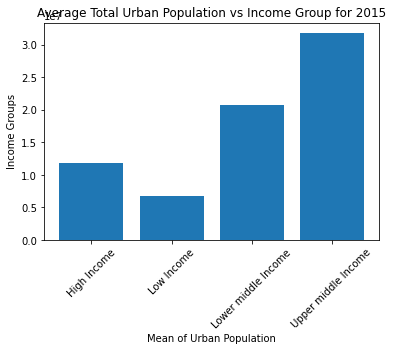

In [19]:
YR_2015_mean = pd.DataFrame(YR_2015)
YR_2015_mean.astype(int)
groups_2015 = YR_2015_mean["2015"] 
groups_2015
Incomegroups = ["High Income","Low Income", "Lower middle Income","Upper middle Income"]
x_axis = len(groups_2015)
plt.xticks(rotation=45)
plt.bar(Incomegroups,groups_2015)
plt.xlabel("Mean of Urban Population")
plt.ylabel("Income Groups")
plt.title("Average Total Urban Population vs Income Group for 2015")

Text(0.5, 1.0, 'Average Total Urban Population vs Income Group for 2016')

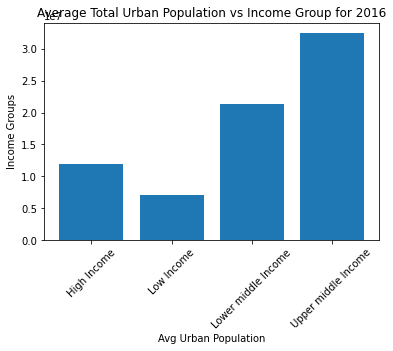

In [20]:
YR_2016_mean = pd.DataFrame(YR_2016)
YR_2016_mean.astype(int)
groups_2016 = YR_2016_mean["2016"] 
groups_2016
Incomegroups = ["High Income","Low Income", "Lower middle Income","Upper middle Income"]
x_axis = len(groups_2016)
plt.xticks(rotation=45)
plt.bar(Incomegroups,groups_2016)
plt.xlabel("Avg Urban Population")
plt.ylabel("Income Groups")
plt.title("Average Total Urban Population vs Income Group for 2016")

Text(0.5, 1.0, 'Average Total Urban Population vs Income Group for 2017')

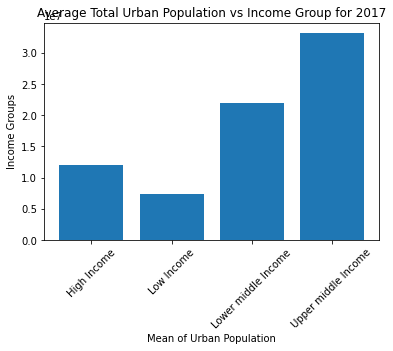

In [21]:
YR_2017_mean = pd.DataFrame(YR_2017)
YR_2017_mean.astype(int)
groups_2017 = YR_2017_mean["2017"] 
groups_2017
Incomegroups = ["High Income","Low Income", "Lower middle Income","Upper middle Income"]
x_axis = len(groups_2017)
plt.xticks(rotation=45)
plt.bar(Incomegroups,groups_2017)
plt.xlabel("Mean of Urban Population")
plt.ylabel("Income Groups")
plt.title("Average Total Urban Population vs Income Group for 2017")

Text(0.5, 1.0, 'Average Total Urban Population vs Income Group for 2018')

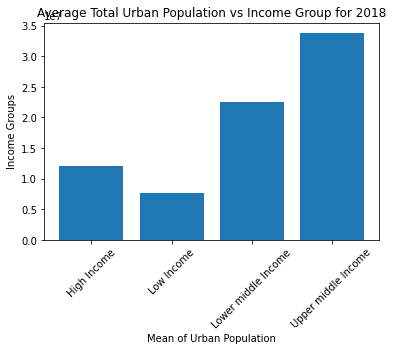

In [22]:
YR_2018_mean = pd.DataFrame(YR_2018)
YR_2018_mean.astype(int)
groups_2018 = YR_2018_mean["2018"] 
groups_2018
Incomegroups = ["High Income","Low Income", "Lower middle Income","Upper middle Income"]
x_axis = len(groups_2018)
plt.xticks(rotation=45)
plt.bar(Incomegroups,groups_2018)
plt.xlabel("Mean of Urban Population")
plt.ylabel("Income Groups")
plt.title("Average Total Urban Population vs Income Group for 2018")

Text(0.5, 1.0, 'Average Total Urban Population vs Income Group for 2019')

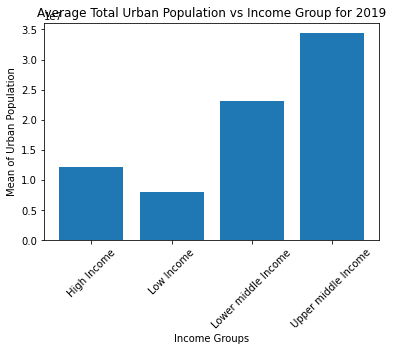

In [23]:
YR_2019_mean = pd.DataFrame(YR_2019)
YR_2019_mean.astype(int)
groups_2019 = YR_2019_mean["2019"] 
groups_2019
Incomegroups = ["High Income","Low Income", "Lower middle Income","Upper middle Income"]
x_axis = len(groups_2019)
plt.xticks(rotation=45)
plt.bar(Incomegroups,groups_2019)
plt.xlabel("Income Groups")
plt.ylabel("Mean of Urban Population")
plt.title("Average Total Urban Population vs Income Group for 2019")

In [24]:
HScore_2015 = final_combined[["Country","2015 Happiness Score"]]
HScore_2016 = final_combined[["Country","2016 Happiness Score"]]
HScore_2017 = final_combined[["Country","2017 Happiness Score"]]
HScore_2018 = final_combined[["Country","2018 Happiness Score"]]
HScore_2019 = final_combined[["Country","2019 Happiness Score"]]

Urban_IGs = Urban_Info[["Country","IncomeGroup"]]
Urban_IGs

IGs_HScore_2015 = pd.merge(Urban_IGs,HScore_2015,how="left",on="Country")
IGs_HScore_2016 = pd.merge(Urban_IGs,HScore_2016,how="left",on="Country")
IGs_HScore_2017 = pd.merge(Urban_IGs,HScore_2017,how="left",on="Country")
IGs_HScore_2018 = pd.merge(Urban_IGs,HScore_2018,how="left",on="Country")
IGs_HScore_2019 = pd.merge(Urban_IGs,HScore_2019,how="left",on="Country")

In [25]:
HSmean_2015 = IGs_HScore_2015.groupby(["IncomeGroup"]).mean()
HSmean_2016 = IGs_HScore_2016.groupby(["IncomeGroup"]).mean()
HSmean_2017 = IGs_HScore_2017.groupby(["IncomeGroup"]).mean()
HSmean_2018 = IGs_HScore_2018.groupby(["IncomeGroup"]).mean()
HSmean_2019 = IGs_HScore_2019.groupby(["IncomeGroup"]).mean()

Text(0.5, 1.0, 'Average Happiness Score vs Income Group for 2015')

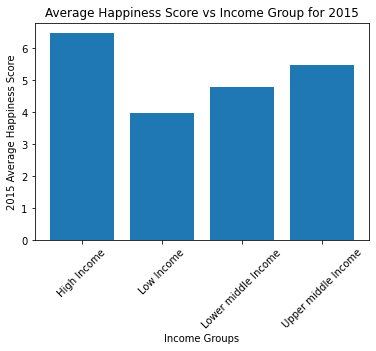

In [26]:
YR_2015_HScore_mean = pd.DataFrame(HSmean_2015)
YR_2015_HScore_mean.astype(int)
groups_2015_HScore_mean = YR_2015_HScore_mean["2015 Happiness Score"] 
groups_2015_HScore_mean
Incomegroups = ["High Income","Low Income", "Lower middle Income","Upper middle Income"]
x_axis = len(groups_2015_HScore_mean)
plt.xticks(rotation=45)
plt.bar(Incomegroups,groups_2015_HScore_mean)
plt.xlabel("Income Groups")
plt.ylabel("2015 Average Happiness Score")
plt.title("Average Happiness Score vs Income Group for 2015")

Text(0.5, 1.0, 'Average Happiness Score vs Income Group for 2016')

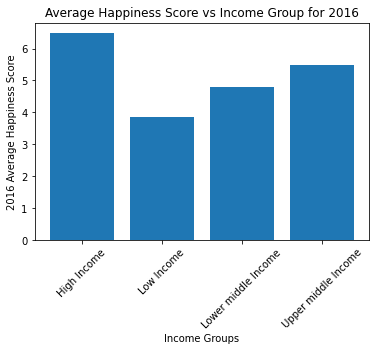

In [28]:
YR_2016_HScore_mean = pd.DataFrame(HSmean_2016)
YR_2016_HScore_mean.astype(int)
groups_2016_HScore_mean = YR_2016_HScore_mean["2016 Happiness Score"] 
groups_2016_HScore_mean
Incomegroups = ["High Income","Low Income", "Lower middle Income","Upper middle Income"]
x_axis = len(groups_2016_HScore_mean)
plt.xticks(rotation=45)
plt.bar(Incomegroups,groups_2016_HScore_mean)
plt.xlabel("Income Groups")
plt.ylabel("2016 Average Happiness Score")
plt.title("Average Happiness Score vs Income Group for 2016")

Text(0.5, 1.0, 'Average Happiness Score vs Income Group for 2017')

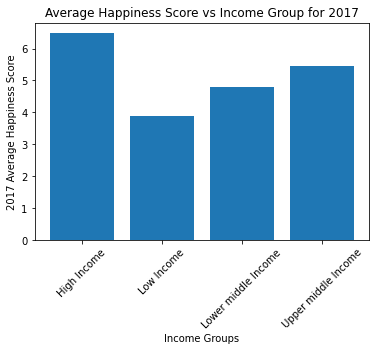

In [29]:
YR_2017_HScore_mean = pd.DataFrame(HSmean_2017)
YR_2017_HScore_mean.astype(int)
groups_2017_HScore_mean = YR_2017_HScore_mean["2017 Happiness Score"] 
groups_2017_HScore_mean
Incomegroups = ["High Income","Low Income", "Lower middle Income","Upper middle Income"]
x_axis = len(groups_2017_HScore_mean)
plt.xticks(rotation=45)
plt.bar(Incomegroups,groups_2017_HScore_mean)
plt.xlabel("Income Groups")
plt.ylabel("2017 Average Happiness Score")
plt.title("Average Happiness Score vs Income Group for 2017")

Text(0.5, 1.0, 'Average Happiness Score vs Income Group for 2018')

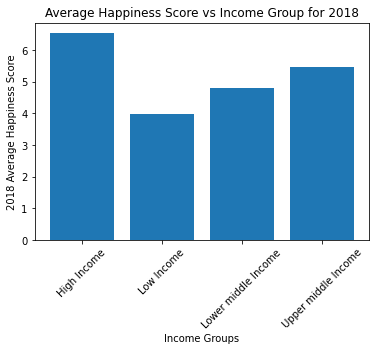

In [30]:
YR_2018_HScore_mean = pd.DataFrame(HSmean_2018)
YR_2018_HScore_mean.astype(int)
groups_2018_HScore_mean = YR_2018_HScore_mean["2018 Happiness Score"] 
groups_2018_HScore_mean
Incomegroups = ["High Income","Low Income", "Lower middle Income","Upper middle Income"]
x_axis = len(groups_2018_HScore_mean)
plt.xticks(rotation=45)
plt.bar(Incomegroups,groups_2018_HScore_mean)
plt.xlabel("Income Groups")
plt.ylabel("2018 Average Happiness Score")
plt.title("Average Happiness Score vs Income Group for 2018")

Text(0.5, 1.0, 'Average Happiness Score vs Income Group for 2019')

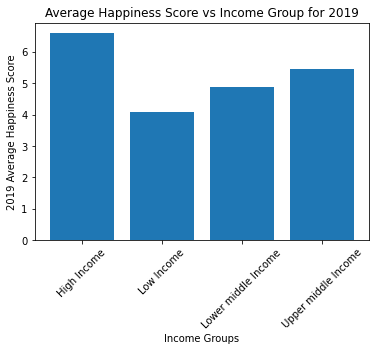

In [31]:
YR_2019_HScore_mean = pd.DataFrame(HSmean_2019)
YR_2019_HScore_mean.astype(int)
groups_2019_HScore_mean = YR_2019_HScore_mean["2019 Happiness Score"] 
groups_2019_HScore_mean
Incomegroups = ["High Income","Low Income", "Lower middle Income","Upper middle Income"]
x_axis = len(groups_2019_HScore_mean)
plt.xticks(rotation=45)
plt.bar(Incomegroups,groups_2019_HScore_mean)
plt.xlabel("Income Groups")
plt.ylabel("2019 Average Happiness Score")
plt.title("Average Happiness Score vs Income Group for 2019")

In [32]:
#average Happiness score per IncomeGroup - possibly
#locations with whatever urban population had higher happiness score?
HappinessScores = final_combined[["Country","2015 Happiness Score","2016 Happiness Score",
                                 "2017 Happiness Score","2018 Happiness Score",
                                 "2019 Happiness Score"]]

IGs_HScores_all = pd.merge(Urban_IGs,HappinessScores,how="left",on="Country")
IGs_HScores_all
HSmeans = IGs_HScores_all.groupby(["IncomeGroup"]).mean()

df = pd.DataFrame(HSmeans)
df

,2015 Happiness Score,2016 Happiness Score,2017 Happiness Score,2018 Happiness Score,2019 Happiness Score
IncomeGroup,,,,,
High income,6.484468,6.489370,6.492152,6.547533,6.602089
Low income,3.976550,3.868833,3.889050,3.980200,4.087684
Lower middle income,4.786229,4.789212,4.786030,4.816121,4.884606
Upper middle income,5.490083,5.475611,5.462914,5.462086,5.447886


(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5]),
 <a list of 9 Text major ticklabel objects>)

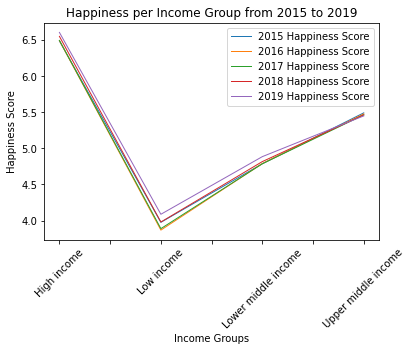

In [33]:
df.plot(subplots=False,alpha=1,linewidth=1)
plt.ylabel("Happiness Score")
plt.xlabel("Income Groups")
plt.title("Happiness per Income Group from 2015 to 2019")
plt.xticks(rotation=45)

(array([3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. ]),
 <a list of 8 Text major ticklabel objects>)

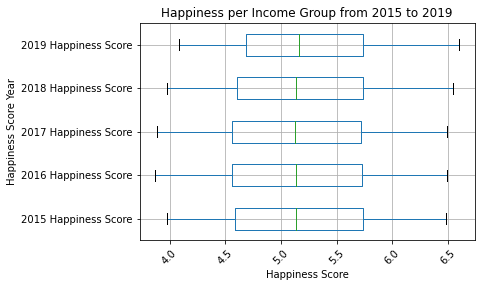

In [34]:
#np.array(Incomegroups).astype(np.float)
#df.boxplot()
plt.xticks(rotation=45)
df.boxplot(vert=False)
plt.ylabel("Happiness Score Year")
plt.xlabel("Happiness Score")
plt.title("Happiness per Income Group from 2015 to 2019")
plt.xticks(rotation=45)

In [ ]:
#Higher income groups continuously had the highest happiness score across all 5 years.
#Higher income groups did not have the highest total urban population. 
#Low income groups continuously had the lowest happiness score across all 5 years.
#Low income groups had the lowest total urban population.